In [1]:
0.11*0.6

0.066

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.colors as colors
import matplotlib
figsfolder="./figscode"

In [27]:
def getPs(pars,x):
    Kx,Kp,w=pars
    
    Z=1+Kx*x+Kp+Kx*Kp*w*x
    P1=1/Z
    P2=Kx*x/Z
    P3=Kp/Z
    P4=Kx*x*Kp*w/Z
    
    return np.array([P1,P2,P3,P4])

def plot_parset(pars,qs,title=None,widerange=False,color="k",figname=None,returnonly=False,xticks=None):
    q3,q4=qs
    if not widerange:
        xvals=np.logspace(-1.,1.,200)
    else:
        xvals=np.logspace(-3,3,1000)
    values=np.zeros(len(xvals))
    xval=0
    Ps=getPs(pars,xval)
    expr0=q3*Ps[2]+q4*Ps[3]
    

    for x_,xval in enumerate(xvals):
        
        Ps=getPs(pars,xval)
        expr=q3*Ps[2]+q4*Ps[3]
        values[x_]=expr/expr0
    if not returnonly:
        fig,ax=plt.subplots(1,1,figsize=(1.5,1))
        ax.plot(xvals,values,color=color)
        ax.set_xscale('log')
        ax.set_xlabel(r"$x$",size=14)
        ax.set_ylabel('fold change ($F(x)$)',size=12)
        ax.axhline(y=1,linestyle="--",color="gray")
        if xticks:
            ax.set_xticks(xticks)
        if title is not None:
            ax.set_title(title)
        plt.tight_layout()
        if figname is not None:
            plt.savefig(figname,bbox_inches="tight")
        plt.show()
    else:
        return values
        
        

/var/folders/5n/cb1vqrr16p397362xt81k93c0000gn/T/ipykernel_4618/2116027758.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


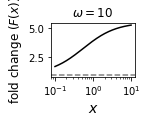

In [55]:
w=10
Kx=1
Kp=0.1
pars=[Kx,Kp,w]
qs=[1,1]
title=r"$\omega=%g$"%(w)
plot_parset(pars,qs,title=title,figname=os.path.join(figsfolder,"Fig1up.pdf"))

/var/folders/5n/cb1vqrr16p397362xt81k93c0000gn/T/ipykernel_4618/2116027758.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


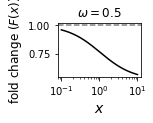

In [56]:
w=0.5
pars=[Kx,Kp,w]
qs=[1,1]
title=r"$\omega=%g$"%(w)
plot_parset(pars,qs,title=title,figname=os.path.join(figsfolder,"Fig1down.pdf"))

In [3]:
def ss(pars,x):
    
    a_x, b_x, a_p, b_p, a_p2, b_p2, a_xp, b_xp, q3, q4=pars
    rho1=b_x*b_p2*a_xp*x+b_x*b_p*b_p2+b_x*b_p*b_xp+b_p*a_p2*b_xp
    rho2=a_x*x*b_p*b_xp+a_x*x*b_p*b_p2+a_x*x*b_p2*a_xp*x+a_p*b_p2*a_xp*x
    rho3=b_x*a_p*b_p2+b_x*a_p*b_xp+a_p*a_p2*b_xp+a_x*x*a_p2*b_xp
    rho4=a_x*x*b_p*a_p2+a_x*x*a_p2*a_xp*x+a_p*a_p2*a_xp*x+b_x*a_p*a_xp*x
    Z=rho1+rho2+rho3+rho4
    P3=rho3/Z
    P4=rho4/Z
    return q3*P3+q4*P4
    


In [66]:
def plot_parset_neq(pars,title=None,color="k",text=None,figname=None,xrange=None,xticks=None):
    if xrange:
        xvals=np.logspace(xrange[0],xrange[1],100)
    elif not widerange:
        xvals=np.logspace(1,2,200)
    else:
        xvals=np.logspace(-3,3,1000)
    values=np.zeros(len(xvals))
    #accessibilities=np.zeros(len(xvals))
    xval=0
    expr0=ss(pars, xval)
    
   

    for x_,xval in enumerate(xvals):
        expr=ss(pars, xval)
        
        values[x_]=expr/expr0
        #accessibilities[x_]=acc/acc0
    fig,ax=plt.subplots(1,1,figsize=(1.8,1.35))
    ax.plot(xvals,values,color=color,linewidth=2)
    ax.set_xscale('log')
    if xticks:
        print("setting xticks",xticks)
        ax.set_xticks(xticks)
        ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    ax.set_xlabel(r"$x$")
    ax.set_ylabel('F(x)',size=14)
    ax.axhline(y=1,linestyle="--",color="gray")
    ax.spines[['right', 'top']].set_visible(False)

    if title is not None:
        ax.set_title(title)
    if text is not None:
        ax.text(0.8,0.8,text,transform=ax.transAxes)
    #plt.tight_layout()
    if figname is not None:
        plt.savefig(figname,bbox_inches="tight")
    plt.show()
    
def plot_parset_bx(pars,xval,title=None,color="k",text=None,figname=None,bTrange=None,xticks=None):
    if not bTrange:
        bxvals=np.logspace(-0.5,1.5,200)
    else:
        bxvals=np.logspace(bTrange[0],bTrange[1],100)
    #print("bxvals", bxvals)
    values=np.zeros(len(bxvals))
    
    
    #acc0=np.sum(Ps[4:])

    for x_,bxval in enumerate(bxvals):
        pars2=np.asarray(pars).copy()
        
        
        pars2[1]=bxval
        pars2[7]=bxval
        
        expr=ss(pars2, xval)
        expr0=ss(pars2, 0)
        values[x_]=expr/expr0
    fig,ax=plt.subplots(1,1,figsize=(1.8,1.35))
    ax.plot(bxvals,values,color=color,linewidth=2)
    ax.set_xscale('log')
    ax.set_xlabel(r"$b_T$",size=14)
    if xticks:
        ax.set_xticks(xticks)
        ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    #ax.set_ylabel('fold change ($F(x)$)',size=14)
    ax.axhline(y=1,linestyle="--",color="gray")
    ax.spines[['right', 'top']].set_visible(False)

    if title is not None:
        ax.set_title(title)
    if text is not None:
        ax.text(0.15,0.8,text,transform=ax.transAxes)
    #plt.tight_layout()
    if figname is not None:
        plt.savefig(figname,bbox_inches="tight")
    plt.show()

In [67]:
0.0005*20

0.01

0.1 3.0
0.8450980400142568
0.0
-1.3010299956639813


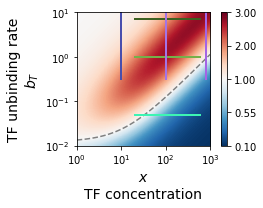

$b_x=0.85$
setting xticks [20, 100, 600]


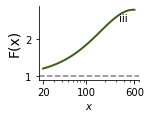

$b_x=0.00$
setting xticks [20, 100, 600]


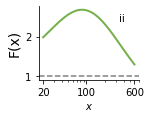

$b_x=-1.30$
setting xticks [20, 100, 600]


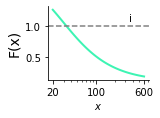

$x$=$1.00$


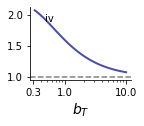

$x$=$2.00$


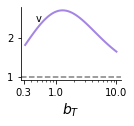

$x$=$2.90$


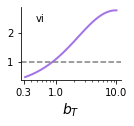

In [68]:
#increasing the kinetics of pol binding - unbinding shifts the activation region towards higher unbinding rates
#a_x=0.04
#a_xp=a_x
#a_p=0.0005*200 #onrate x pol concentration. Po
#b_p=1
#a_p2fc=50 #20
#b_p2fc=0.1

#a_p2=a_p*a_p2fc
#b_p2=b_p*b_p2fc

#q3=1
#q4=0.025*q3

a_x=0.01
a_xp=a_x
a_p=0.0005*20 #onrate x pol concentration. Po
b_p=0.1
a_p2fc=10 #20
b_p2fc=0.1

a_p2=a_p*a_p2fc
b_p2=b_p*b_p2fc

q3=1
q4=0.01*q3



xvals=np.logspace(0,3,200)
bxvals=np.logspace(-2,1,200) #called bT in the paper
out=np.zeros((len(bxvals), len(xvals)))

for b, b_x in enumerate(bxvals):
    b_xp=b_x
    
    pars=[a_x, b_x, a_p, b_p, a_p2, b_p2, a_xp, b_xp,q3,q4]
    out0=ss(pars, 0)

    for x_,xval in enumerate(xvals):
        expr=ss(pars,xval)
        out[b,x_]=expr/out0
        
bxlist=[np.log10(7),np.log10(1),np.log10(0.05)] #line at each of these three unbinding rates, as a function of concentration
xlist=[1,2,2.9] #line at each of these three concentrations, as a function of unbinding rates
xlplot=[np.log10(20),np.log10(600)]
xticks_conc=[20,100,600]
bTlplot=[-0.5,1.]
xticks_bT=[np.round(10**bTlplot[0],1),1,np.round(10**bTlplot[1])]
colors_bx=["#3d6020ff","#75b04aff","#3df4b3ff"]
fig,axplt=plt.subplots(1,1,figsize=(4,3)) 
#ar=np.ma.masked_array(out,mask=out<1)
min_val_rounded=np.round(out.min(),1) #round minimum value to 1 decimal
max_val_rounded=np.round(out.max(),0) #round max value to 0 decimals
print(min_val_rounded, max_val_rounded)
norm=colors.TwoSlopeNorm(vmin=min_val_rounded, vcenter=1., vmax=max_val_rounded)
extent=[np.log10(xvals[0]),np.log10(xvals[-1]),np.log10(bxvals[0]),np.log10(bxvals[-1])]
im=axplt.imshow(out,origin="lower",norm=norm,cmap=plt.cm.RdBu_r,extent=extent)
axplt.set_xticks([0,1,2,3])
axplt.set_xticklabels([r"$10^0$",r"$10^1$",r"$10^2$",r"$10^3$"])
axplt.set_yticks([-2,-1,0,1])
axplt.set_yticklabels([r"$10^{-2}$",r"$10^{-1}$",r"$10^0$",r"$10^1$"])
axplt.contour(out,extent=extent,levels=[1],linestyles=["--"],colors=["gray"])
for b_,bx in enumerate(bxlist):
    print(bx)
    axplt.plot(xlplot,[bx,bx],linestyle="-",color=colors_bx[b_],linewidth=2.)
axplt.plot([xlist[0],xlist[0]],bTlplot,linestyle="-",color="#484eadff",linewidth=2.)
axplt.plot([xlist[1],xlist[1]],bTlplot,linestyle="-",color="#a474e5ff",linewidth=2.)
axplt.plot([xlist[2],xlist[2]],bTlplot,linestyle="-",color="#a464e5ff",linewidth=2.)
    #ax.axhline(y=np.log10(bG),)
#ax.set_xscale('log')
axplt.set_ylabel("TF unbinding rate\n"+r"$b_T$",size=14)
axplt.set_xlabel(r"$x$"+"\nTF concentration",size=14)

#axplt.set_title(title)
below_one=np.linspace(min_val_rounded,1,3)
above_one=np.linspace(1,max_val_rounded,3)
bounds=np.concatenate((below_one,above_one[1:]))
plt.colorbar(im,ax=axplt,ticks=bounds)
#ax.axhline(y=1,linestyle="--",color="gray")
#if title is not None:
#    ax.set_title(title)
#plt.savefig("cmaptest.pdf",bbox_inches="tight")
plt.tight_layout()
plt.savefig(os.path.join(figsfolder,"Fig1TFwbTx.svg"),bbox_inches="tight")
plt.show()
        
text_labels=["iii","ii","i"]
for b_,bx in enumerate(bxlist):
    figname=os.path.join(figsfolder,"fig1TFw_panel%s.svg"%text_labels[b_])
    
    b_x=10**bx
    b_xp=b_x
    pars=[a_x, b_x, a_p, b_p, a_p2, b_p2, a_xp, b_xp,q3,q4]
    
    title=r"$b_x=%2.2f$"%(bx)
    print(title)
    plot_parset_neq(pars,title=None,color=colors_bx[b_],text=text_labels[b_],figname=figname,xrange=xlplot,xticks=xticks_conc)
    #plot_parset(pars,qs,title=title,color=colors_bx[b_],text=text_labels[b_],figname=None)

#now as a function of bx

pars=[a_x, b_x, a_p, b_p, a_p2, b_p2, a_xp, b_xp,q3,q4]
    
text_labels=["iv","v","vi"]
colors_lines=["#494eadff","#a484e5ff","#a474e5ff"]
for x_,x in enumerate(xlist):
    title=r"$x$=$%2.2f$"%(x)
    figname=os.path.join(figsfolder,"fig1TFw_panel%s.svg"%text_labels[x_])
    print(title)
    plot_parset_bx(pars,10**x,title=None,text=text_labels[x_],color=colors_lines[x_],figname=figname,bTrange=bTlplot,xticks=xticks_bT)
    #plot_parset_bx(pars,qs,x,title=title,text=text_labels[x_],color=colors_lines[x_],figname=None)


In [53]:
bTlplot

[-0.5, 1.0]